In [486]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [487]:
df = pd.read_excel("/content/drive/MyDrive/MachineLearning/bsdatos_drive.xlsx")

landsat = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/landsat.xlsx")
landsat1 = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/Landsat_Datos.xlsx")

sentinel = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/sentinel.xlsx")
sentinel1 = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/Sentinel_Datos.xlsx")

dfx = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/x.xlsx")
dfy = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/y.xlsx")
dfy_new = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/dfy_new.xlsx")

y_bruta = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/y_bruta.xlsx")

In [488]:
y_bruta

,amb,amc
0,26.38,26.84
1,23.00,23.11
2,23.26,23.37
3,30.53,30.84
4,13.10,12.86
...,...,...
75,26.81,27.00
76,20.15,19.96
77,20.31,20.12
78,19.20,18.99


In [489]:
# datos para regesión lineal

sen = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/base_todo.xlsx")

sen['b5pb8'] = sen['b5']*sen['b8']
sen['b2nb8'] = sen['b2']/sen['b8']
sen['b3pb6'] = sen['b3']*sen['b6']

sen

,b2,b8,b3nb8,b3,b6,b8nb3,b5,b2pb12,b12,Log_amc,log_amb,b5pb8,b2nb8,b3pb6
0,0.0213,0.0173,1.514451,0.0262,0.0180,0.660305,0.0242,0.000160,0.0075,1.428783,1.421275,0.000419,1.231214,0.000472
1,0.0220,0.0117,2.085470,0.0244,0.0108,0.479508,0.0200,0.000213,0.0097,1.363800,1.361728,0.000234,1.880342,0.000264
2,0.0238,0.0080,3.187500,0.0255,0.0104,0.313725,0.0217,0.000064,0.0027,1.368659,1.366610,0.000174,2.975000,0.000265
3,0.0181,0.0169,1.284024,0.0217,0.0227,0.778802,0.0230,0.000118,0.0065,1.489114,1.484727,0.000389,1.071006,0.000493
4,0.0183,0.0076,2.605263,0.0198,0.0090,0.383838,0.0181,0.000051,0.0028,1.109241,1.117271,0.000138,2.407895,0.000178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0226,0.0107,1.990654,0.0213,0.0133,0.502347,0.0216,0.000106,0.0047,1.431364,1.428297,0.000231,2.112150,0.000283
76,0.0175,0.0070,1.757143,0.0123,0.0082,0.569106,0.0110,0.000070,0.0040,1.300161,1.304275,0.000077,2.500000,0.000101
77,0.0186,0.0068,1.794118,0.0122,0.0089,0.557377,0.0113,0.000050,0.0027,1.303628,1.307710,0.000077,2.735294,0.000109
78,0.0202,0.0110,1.818182,0.0200,0.0132,0.550000,0.0197,0.000057,0.0028,1.278525,1.283301,0.000217,1.836364,0.000264


# scatterplot 

In [832]:
X = sen[['b8' , 'b8nb3' , 'b5pb8' , 'b2pb12' , 'b3nb8']]
y = sen[['Log_amc']]


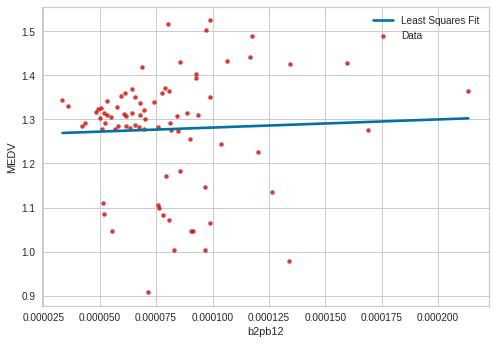

In [840]:
fig, ax = plt.subplots(1,1)
sns.regplot(x=X['b2pb12'], y=y, ax=ax, order=1, ci=None, scatter_kws={'color':'r', 's':20})
ax.set_ylabel("MEDV")
# ax.set_xlim(0,0.025)
# ax.set_ylim(0.75,1.75)
ax.set_xlabel("b2pb12")
ax.legend(['Least Squares Fit','Data']);

## Residual Sum of Squares - RSS

In [ ]:
X1 = X.to_numpy()
X1

# Transformación de variables

In [834]:
from scipy import stats
transf_amc, lambda_amc = stats.boxcox(y_bruta['amc'])
print(transf_amc)


[21.05606084 18.22365534 18.42229156 24.05628621 10.2087954  24.79353614
 25.99574688 25.49915457 20.57260231 17.66491551  9.21608984  6.30422265
  7.49145477  7.96030897  8.81816237 11.78217906 19.47348056 10.83406493
 12.1073075  16.68910505 18.02482777 17.71856014 17.15841044 15.03324513
 15.47578463 16.0022859  16.16457349 16.32671838 16.90466601 17.43484669
 17.23523734 15.3051126  16.34215337 16.04093883 16.24952422  8.81002601
  9.97550469 16.31128211  9.65296538  9.36190405 10.1284017  13.90226037
 13.34557849 14.95549018  8.79375142  9.60450691 18.23894181 15.26630037
 15.1031946  16.1722979  16.43473648 16.18774574 18.48337227 14.26189319
 17.82580651 21.65900095 18.04777925 14.94771275 15.3671943  14.9088203
 15.15758019 15.29735084 15.5300548  15.53780633 15.21971431 16.52727385
 16.69680785 16.06412667 17.37344996 16.83540504 21.1541421  19.92894011
  7.9767181  11.16149582 20.86732857 21.17677048 15.80115831 15.92495548
 15.04879191 15.04879191]


In [494]:
sen["transf_amc"]= transf_amc
lm=sm.OLS.from_formula("transf_amc ~ b8 + b8nb3 + b5pb8 + b2pb12", sen).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             transf_amc   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     11.10
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           4.01e-07
Time:                        03:06:36   Log-Likelihood:                -209.00
No. Observations:                  80   AIC:                             428.0
Df Residuals:                      75   BIC:                             439.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6593      2.198      6.214      0.0

## Modelo de regresión multivariado

In [495]:
# g1 = dinoflaglados + diatomeas + algas cafes (a+c)

lm=sm.OLS(dfy['Log_amc'], sentinel1).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                Log_amc   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1254.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                    1.61e-74
Time:                        03:06:36   Log-Likelihood:                          69.461
No. Observations:                  80   AIC:                                     -120.9
Df Residuals:                      71   BIC:                                     -99.48
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [496]:
# g2 = algas verdes + euglonofitas (a+b)

lm=sm.OLS(dfy['log_amb'], sentinel1).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                log_amb   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1299.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                    4.55e-75
Time:                        03:06:36   Log-Likelihood:                          70.654
No. Observations:                  80   AIC:                                     -123.3
Df Residuals:                      71   BIC:                                     -101.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Intercepto

In [497]:

# g1 = dinoflaglados + diatomeas + algas cafes (a+c)

import statsmodels.formula.api as smf
lm=smf.ols(formula='Log_amc ~ b8 + b8nb3 + b5pb8 + b2pb12 + b3nb8', data=sen).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_amc   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     10.53
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.17e-07
Time:                        03:06:36   Log-Likelihood:                 71.733
No. Observations:                  80   AIC:                            -131.5
Df Residuals:                      74   BIC:                            -117.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8170      0.329      5.524      0.0

In [498]:

# g2 = algas verdes + euglonofitas (a+b)

import statsmodels.formula.api as smf
lm=smf.ols(formula='log_amb ~ b8 + b8nb3 + b5pb8 + b2pb12 + b3nb8', data=sen).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                log_amb   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     10.97
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           6.35e-08
Time:                        03:06:36   Log-Likelihood:                 73.203
No. Observations:                  80   AIC:                            -134.4
Df Residuals:                      74   BIC:                            -120.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8391      0.323      5.695      0.0

## Regresiones no lineales

In [499]:
lm=sm.OLS.from_formula("Log_amc ~ b8 + b8nb3 + b5pb8 + b2pb12 + I(b5**3)", sen).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_amc   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     9.822
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           3.15e-07
Time:                        03:06:36   Log-Likelihood:                 70.600
No. Observations:                  80   AIC:                            -129.2
Df Residuals:                      74   BIC:                            -114.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0412      0.161      6.483      0.0

## Evaluación de la regresión

In [841]:
X = sen[['b8' , 'b8nb3' , 'b5pb8' , 'b2pb12' , 'b3nb8']]
y = sen[['Log_amc']]

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

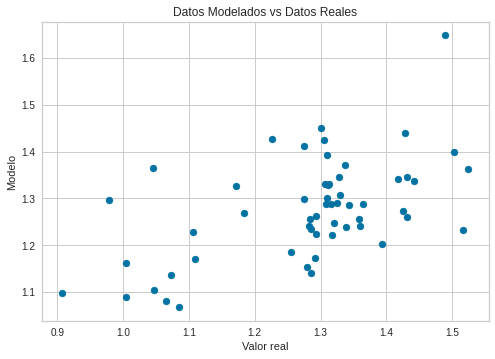

In [842]:
lm=sm.OLS(y_train, x_train).fit()
y_pred=lm.predict(x_train)
y_test_pred=lm.predict(x_train)
plt.scatter(y_train,y_pred)
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real')
plt.ylabel('Modelo');

El error residual, es decir la diferencia entre los datos de predicción y las variables predictoras, se distribuye de la siguiente manera para este ejemplo.

In [502]:
y1 = lm.resid
X

,b8,b8nb3,b5pb8,b2pb12,b3nb8
0,0.0173,0.660305,0.000419,0.000160,1.514451
1,0.0117,0.479508,0.000234,0.000213,2.085470
2,0.0080,0.313725,0.000174,0.000064,3.187500
3,0.0169,0.778802,0.000389,0.000118,1.284024
4,0.0076,0.383838,0.000138,0.000051,2.605263
...,...,...,...,...,...
75,0.0107,0.502347,0.000231,0.000106,1.990654
76,0.0070,0.569106,0.000077,0.000070,1.757143
77,0.0068,0.557377,0.000077,0.000050,1.794118
78,0.0110,0.550000,0.000217,0.000057,1.818182


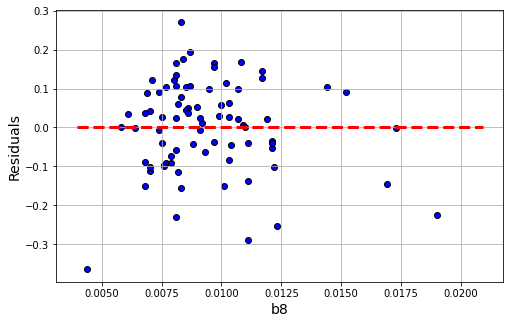

In [503]:
plt.figure(figsize=(8,5))
plt.scatter(x=X['b8'], y=lm.resid, color='blue',edgecolor='k')
plt.grid(True)
xmin=min(X['b8'])
xmax = max(X['b8'])
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.ylabel('Residuals',fontsize=14)
plt.xlabel('b8',fontsize=14)
plt.show()

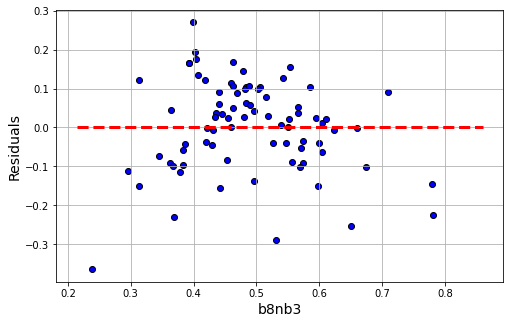

In [504]:
plt.figure(figsize=(8,5))
plt.scatter(x=X['b8nb3'], y=lm.resid, color='blue',edgecolor='k')
plt.grid(True)
xmin=min(X['b8nb3'])
xmax = max(X['b8nb3'])
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.ylabel('Residuals',fontsize=14)
plt.xlabel('b8nb3',fontsize=14)
plt.show()

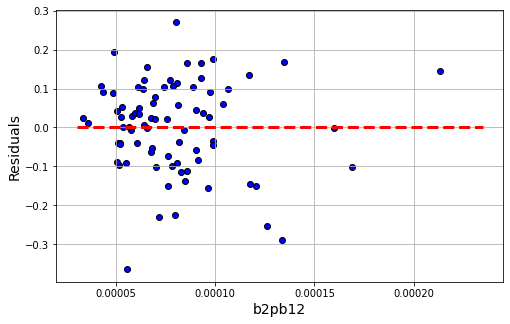

In [505]:
plt.figure(figsize=(8,5))
plt.scatter(x=X['b2pb12'], y=lm.resid, color='blue',edgecolor='k')
plt.grid(True)
xmin=min(X['b2pb12'])
xmax = max(X['b2pb12'])
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.ylabel('Residuals',fontsize=14)
plt.xlabel('b2pb12',fontsize=14)
plt.show()

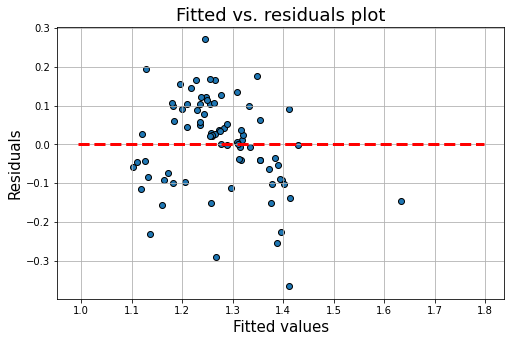

In [506]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=lm.fittedvalues,y=lm.resid,edgecolor='k')
xmin=min(lm.fittedvalues)
xmax = max(lm.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

## Histogramas de residuos normalizados

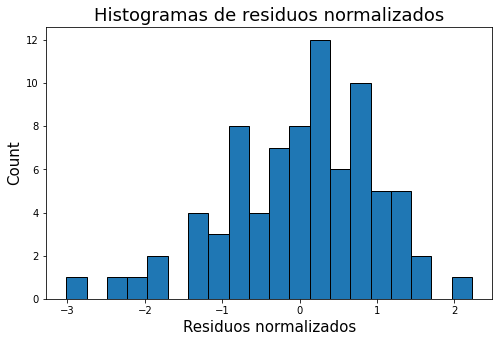

In [507]:
plt.figure(figsize=(8,5))
plt.hist(lm.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Residuos normalizados',fontsize=15)
plt.title("Histogramas de residuos normalizados",fontsize=18)
plt.show()

## Q-Q plot of the residuals

<Figure size 576x360 with 0 Axes>

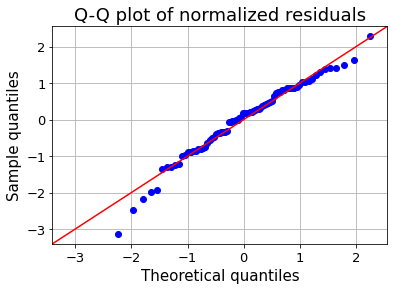

In [508]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(lm.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

In [509]:
from scipy.stats import shapiro
_,p=shapiro(lm.resid)
if p<0.01:
    print("The residuals seem to come from Gaussian process")
else:
    print("The normality assumption may not hold")

The normality assumption may not hold


## Comprobación de valores atípicos en los residuos

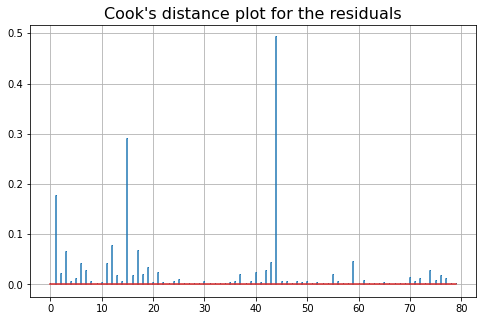

In [510]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence
inf=influence(lm)
(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.grid(True)
plt.show()

## Factor de inflación de varianza

In [ ]:
X1 = X.to_numpy()
X1

In [512]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(X1[1])):
    v=vif(np.matrix(X1[1]),i)
    print("Variance inflation factor for x{}: {}".format([i+1],round(v,2)))

Variance inflation factor for x[1]: 0.0
Variance inflation factor for x[2]: 0.0
Variance inflation factor for x[3]: 0.0
Variance inflation factor for x[4]: 0.0
Variance inflation factor for x[5]: 0.0


# Metricas

In [763]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [514]:
y_train_pred=lm.predict(x_train)
y_test_pred=lm.predict(x_test)

In [515]:
print('TRAIN MAE:', mean_absolute_error(y_train,y_train_pred))
print('TEST MAE:', mean_absolute_error(y_test,y_test_pred))

TRAIN MAE: 0.09356179206746376
TEST MAE: 0.0913776697457675


In [516]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE: 0.11463371723961284
Test RMSE: 0.12332338187532618


In [517]:
print('R2 Train:',lm.rsquared)
print('R2 Test:',lm.rsquared)

R2 Train: 0.991654405943256
R2 Test: 0.991654405943256


In [518]:
print('R2 Train:',lm.rsquared_adj)
print('R2 Test:',lm.rsquared_adj)

R2 Train: 0.9910980330061397
R2 Test: 0.9910980330061397


## Regresión Lineal con Sklearn

In [761]:
from sklearn.linear_model import LinearRegression

In [764]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Intercepto:',model.intercept_)
print('Coeficientes:',model.coef_)

Intercepto: 1.2828605890034366
Coeficientes: [-0.37136214  0.07554246  0.29807881  0.01100755 -0.07444976]


Metricas

In [521]:
print('R2:',model.score(x_test,y_test))
print('R2:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2: 0.4819125057527587
R2: 0.4819125057527587
MSE: 0.007931836500835919
MAE: 0.0708594902261612


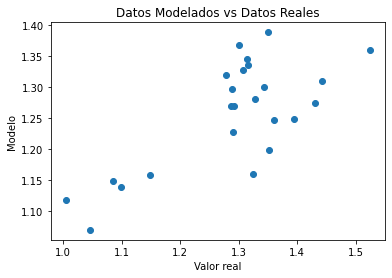

In [522]:
plt.scatter(y_test,y_pred)
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real')
plt.ylabel('Modelo');

# Cross validation

In [858]:
kfold = KFold(n_splits=6, random_state=7, shuffle=True)
results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
print(results)
print(results.mean())

[ 0.58095807 -0.30127418  0.34946482  0.20859825  0.35269795  0.62827844]
0.30312055989757525


In [852]:
kfold = KFold(n_splits=10, random_state=7 , shuffle=True)
results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
print(results)
print(results.mean())

[ 0.64889034 -0.12961327 -1.32486257  0.36655217 -5.35536696  0.1299428
  0.66977759  0.23371133  0.78855107  0.53988002]
-0.3432537484927537


# Regularización

In [525]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [722]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_score = lr.score(x_train,y_train)
print('Linear regression score:', lr_score)

Linear regression score: 0.4075202064774469


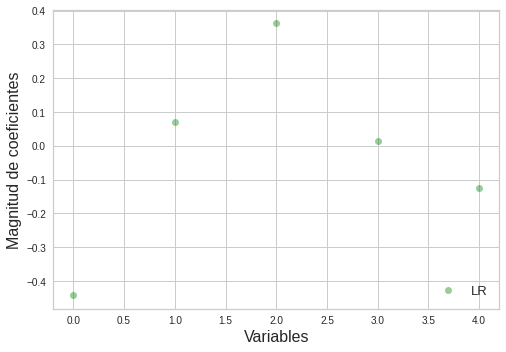

In [723]:
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='LR')
plt.xlabel('Variables',fontsize=16)
plt.ylabel('Magnitud de coeficientes',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [724]:
print(lr.coef_)

[-0.44202726  0.07132318  0.36209385  0.01418998 -0.12349518]


### Ridge regression

In [725]:
rr001 = Ridge(alpha=0.01)
rr001.fit(x_train,y_train)
Ridge_score_001 = rr001.score(x_train,y_train)
print('Ridge score_001:', Ridge_score_001)

rr = Ridge()
rr.fit(x_train,y_train)
Ridge_score = rr.score(x_train,y_train)
print('Ridge score_1:', Ridge_score)

rr100 = Ridge(alpha=100)
rr100.fit(x_train,y_train)
Ridge_score_100 = rr100.score(x_train,y_train)
print('Ridge score_100:', Ridge_score_100)

Ridge score_001: 0.4074778404076296
Ridge score_1: 0.32694271227345495
Ridge score_100: 0.087367279371943


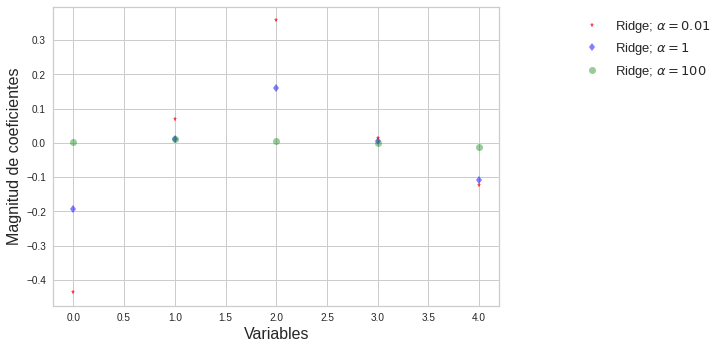

In [726]:
plt.plot(rr001.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=4) # zorder for ordering the markers
plt.plot(rr.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 1$') # alpha here is for transparency
plt.plot(rr100.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label=r'Ridge; $\alpha = 100$')
plt.xlabel('Variables',fontsize=16)
plt.ylabel('Magnitud de coeficientes',fontsize=16)
# plt.legend(fontsize=13,loc='best right')

plt.legend(fontsize=13, 
           bbox_to_anchor = (1.5, 1), loc = 'upper rigth') 
plt.show()

In [727]:
model = Ridge()

In [728]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Intercepto:',model.intercept_)
print('Coeficientes:',model.coef_)
print('R2:',r2_score(y_test,y_pred))

Intercepto: 1.2653719568836337
Coeficientes: [-0.1935935   0.01145765  0.16125077  0.00500728 -0.10839004]
R2: 0.26243206920318907


In [737]:
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
results = cross_val_score(model, x_train,y_train, cv=kfold, scoring='explained_variance')
print(results)
print(results.mean())

[-0.09920067  0.2994552   0.0633677   0.33391045  0.07601222]
0.13470897950264543


### LASSO Regression

In [738]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train,y_train)
lasso_score001=lasso001.score(x_train,y_train)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("Lasso score para alpha=0.01 es", lasso_score001) 
print ("Número de variables utilizadas para alpha =0.01:", coeff_used001)
print(lasso001.coef_)

lasso = Lasso()
lasso.fit(x_train,y_train)
lasso_score_1=lasso.score(x_train,y_train)
coeff_used = np.sum(lasso.coef_!=0)
print ("Lasso score para alpha=1 es", lasso_score_1) 
print ("Número de variables utilizadas para alpha =1: ", coeff_used)
print(lasso.coef_)

lasso100 = Lasso(alpha=100, max_iter=10e5)
lasso100.fit(x_train,y_train)
lasso_score100=lasso100.score(x_train,y_train)
coeff_used100 = np.sum(lasso100.coef_!=0)
print ("Lasso score para alpha=100 es", lasso_score100) 
print ("Número de variables utilizadas para alpha =100:", coeff_used100)
print(lasso100.coef_)

Lasso score para alpha=0.01 es 0.12615021069811616
Número de variables utilizadas para alpha =0.01: 1
[-0.          0.          0.          0.         -0.04682143]
Lasso score para alpha=1 es 0.0
Número de variables utilizadas para alpha =1:  0
[ 0.  0.  0.  0. -0.]
Lasso score para alpha=100 es 0.0
Número de variables utilizadas para alpha =100: 0
[ 0.  0.  0.  0. -0.]


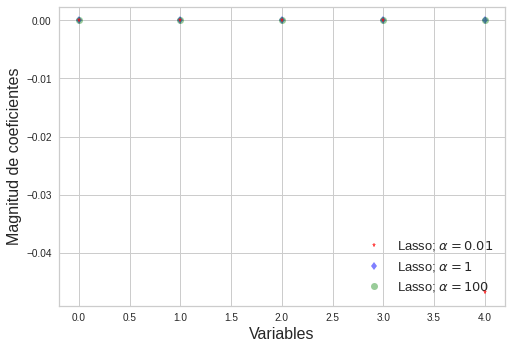

In [739]:
plt.plot(lasso001.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 1$') # alpha here is for transparency
plt.plot(lasso100.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label=r'Lasso; $\alpha = 100$')
plt.xlabel('Variables',fontsize=16)
plt.ylabel('Magnitud de coeficientes',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

#### Tipo Lasso

In [740]:
from sklearn.linear_model import Lasso
model = Lasso()

In [741]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Intercepto:',model.intercept_)
print('Coeficientes:',model.coef_)
print('R2:',r2_score(y_test,y_pred))

Intercepto: 1.2765519252733457
Coeficientes: [ 0.  0.  0.  0. -0.]
R2: -0.0009469984548893251


In [743]:
kfold = KFold(n_splits=5, random_state=1,  shuffle=True)
results = cross_val_score(model, x_train,y_train, cv=kfold, scoring='explained_variance')
print(results)
print(results.mean())

[ 1.11022302e-16 -2.22044605e-16  0.00000000e+00  1.11022302e-16
  0.00000000e+00]
0.0


# Support Vector Machine

In [744]:
X = sen[['b8' , 'b8nb3' , 'b5pb8' , 'b2pb12' , 'b3nb8']]
y = sen[['Log_amc']]


In [746]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3)


In [872]:
from sklearn.svm import SVR
svr = SVR()

svr_lin = SVR(kernel="poly", C=1000, gamma=0.1)
svr_rbf = SVR(kernel="rbf", C=1000, gamma=0.1)
y_lin = svr_lin.fit(x_train,y_train).predict(x_train)
y_rbf = svr_rbf.fit(x_train,y_train).predict(x_train)


In [748]:
y_linf = pd.DataFrame(y_lin)

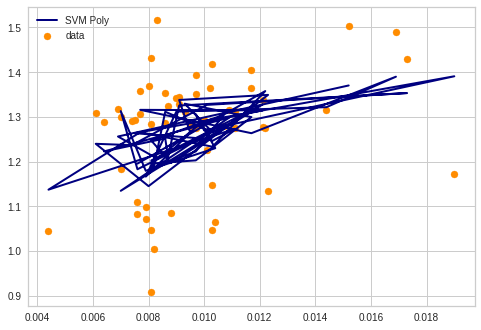

In [750]:
plt.scatter(x_train['b8'],y_train, color="darkorange", label="data")
plt.plot(x_train['b8'],y_lin, color="navy", lw = 2, label = "SVM Poly")
# plt.plot(x_train['b8'],y_rbf, color="c", lw=2, label="SVM Radial")
plt.legend();

In [751]:
results = cross_val_score(svr_lin,x_train , y_train, cv=kfold)
print(results.mean())
print(results.std())

0.05477468432718631
0.03709357635670965


In [753]:
results = cross_val_score(svr_rbf, x_train , y_train, cv=kfold)
print(results.mean())
print(results.std())

-1.5672138509222933
3.0471633539994323


# Redes neuronales

In [754]:

X = sen[['b8' , 'b8nb3' , 'b5pb8' , 'b2pb12' , 'b3nb8']]
y = dfy['Log_amc']



In [755]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.transform(X)

In [756]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [707]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(15,15,15,15),max_iter=600).fit(X_train, y_train)
regr.predict(X_test)

print(regr.score(X_test, y_test))


0.2734631337609381


In [758]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
results = cross_val_score(regr, X_train, y_train, cv=kfold)
print(results.mean())

-1.7079987100840448


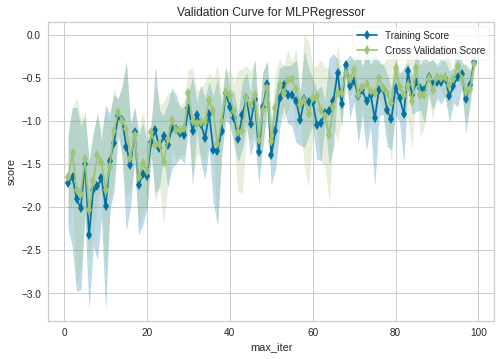

In [716]:
from yellowbrick.model_selection import ValidationCurve
h= np.arange(1,100)
k= ValidationCurve(regr,param_name='max_iter', param_range=h, cv=5, scoring='max_error',n_jobs=2)
k.fit(X_train,y_train)
k.show();


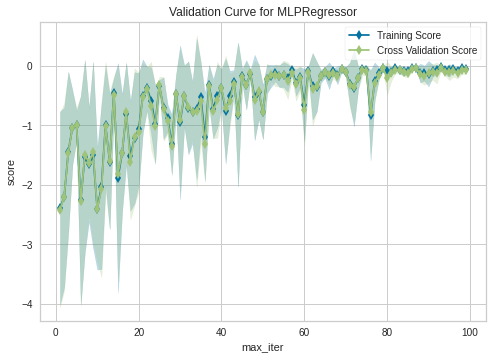

In [719]:
from yellowbrick.model_selection import ValidationCurve
h= np.arange(1,100)
k= ValidationCurve(regr,param_name='max_iter', param_range=h, cv=5, scoring='neg_mean_squared_error',n_jobs=2)
k.fit(X_train,y_train)
k.show();

# Metodo ensamblados

In [766]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [759]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
from pprint import pprint
pprint(rf.get_params())

In [768]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [769]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [770]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [772]:
from sklearn.model_selection import GridSearchCV

In [773]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [1000, 1500, 1800, 2000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)

In [774]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [1000, 1500, 1800, 2000]},
             scoring='neg_mean_absolute_error', verbose=2)

In [775]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [776]:
rf_best1 = RandomForestRegressor(n_estimators=1800,min_samples_split=5,min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=False)
rf_best1.fit(X_train, y_train);
y_pred = rf_best1.predict(X_test)
print(rf_best1.score(X_test,y_test))

0.6230524063878651


In [777]:
rf_best2 = RandomForestRegressor(bootstrap=True, max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=1000)
rf_best2.fit(X_train, y_train);
y_pred = rf_best2.predict(X_test)
print(rf_best2.score(X_test,y_test))

0.5257872125651777


# Metodo Knn

In [860]:
X = sen[['b8' , 'b8nb3' , 'b5pb8' , 'b2pb12' , 'b3nb8']]
y = sen[['Log_amc']]

In [864]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [865]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn_train = knn.fit(X_train,y_train)

In [866]:
print(knn_train.score(X_test, y_test))

-0.055248027873735506
